In [1]:
#http://blog.yhat.com/posts/customer-segmentation-using-python.html

In [2]:
import numpy as np
import pandas as pd

In [3]:
xls = pd.ExcelFile('WineKMC.xlsx')

In [4]:
sheet_name = xls.sheet_names
sheet_name

['OfferInformation',
 'Transactions',
 'Pivot',
 'Matrix',
 '4MC',
 '4MC - TopDealsByCluster',
 'Distances',
 '4MC Silhouette',
 '5MC',
 '5MC - TopDealsByCluster',
 '5MC Silhouette',
 '5MedC',
 '5MedC - TopDealsByCluster']

In [5]:
# Method 1 : Syntax error 
# create dataframe with loop
# exec('{} = pd.DataFrame()'.format(name)) >> got invalid syntax
# https://stackoverflow.com/questions/30635145/create-multiple-dataframes-in-loop

# Method 2 : use this one
# https://stackoverflow.com/questions/35374995/create-multiple-dataframe-using-for-loop-in-python-2-7

for name in sheet_name:
    globals()["df_" + name] = xls.parse(name)

In [6]:
# list all dataframe
# https://stackoverflow.com/questions/34949786/show-all-pandas-dataframes-in-an-ipython-notebook

%whos DataFrame

Variable                       Type         Data/Info
-----------------------------------------------------
df_4MC                         DataFrame               Offer #   Camp<...>\n[38 rows x 111 columns]
df_4MC - TopDealsByCluster     DataFrame        Offer # Offer date   <...>   True   0   0   3   1  
df_4MC Silhouette              DataFrame              Name  Community<...>\n[100 rows x 13 columns]
df_5MC                         DataFrame               Offer #   Camp<...>\n[39 rows x 112 columns]
df_5MC - TopDealsByCluster     DataFrame        Offer # Offer date   <...>True   0   0   0   1  3  
df_5MC Silhouette              DataFrame              Name  Community<...>\n[100 rows x 14 columns]
df_5MedC                       DataFrame               Offer #   Camp<...>\n[39 rows x 112 columns]
df_5MedC - TopDealsByCluster   DataFrame        Offer # Offer date   <...> True   0  0   0  4   0  
df_Distances                   DataFrame                         0   <...>n[101 rows x 100 c

In [7]:
df_OfferInformation.head(10)

,Offer #,Campaign,Varietal,Minimum Qty (kg),Discount (%),Origin,Past Peak
0,1,January,Malbec,72,56,France,False
1,2,January,Pinot Noir,72,17,France,False
2,3,February,Espumante,144,32,Oregon,True
3,4,February,Champagne,72,48,France,True
4,5,February,Cabernet Sauvignon,144,44,New Zealand,True
5,6,March,Prosecco,144,86,Chile,False
6,7,March,Prosecco,6,40,Australia,True
7,8,March,Espumante,6,45,South Africa,False
8,9,April,Chardonnay,144,57,Chile,False
9,10,April,Prosecco,72,52,California,False


In [8]:
df_Transactions.head(10)

,Customer Last Name,Offer #
0,Smith,2
1,Smith,24
2,Johnson,17
3,Johnson,24
4,Johnson,26
5,Williams,18
6,Williams,22
7,Williams,31
8,Brown,7
9,Brown,29


In [9]:
merged = pd.merge(df_OfferInformation, df_Transactions)
merged['n'] = 1
merged.head(10)

,Offer #,Campaign,Varietal,Minimum Qty (kg),Discount (%),Origin,Past Peak,Customer Last Name,n
0,1,January,Malbec,72,56,France,False,Thomas,1
1,1,January,Malbec,72,56,France,False,Jackson,1
2,1,January,Malbec,72,56,France,False,Mitchell,1
3,1,January,Malbec,72,56,France,False,Peterson,1
4,1,January,Malbec,72,56,France,False,Wood,1
5,1,January,Malbec,72,56,France,False,Price,1
6,1,January,Malbec,72,56,France,False,Foster,1
7,1,January,Malbec,72,56,France,False,Sanders,1
8,1,January,Malbec,72,56,France,False,Butler,1
9,1,January,Malbec,72,56,France,False,Fisher,1


In [10]:
matrix = merged.pivot_table(index=['Customer Last Name'], columns=['Offer #'], values='n')
matrix = matrix.fillna(0).reset_index()
x_cols = matrix.columns[1:]
matrix.head(10)

Offer #,Customer Last Name,1,2,3,4,5,6,7,8,9,...,23,24,25,26,27,28,29,30,31,32
0,Adams,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0
1,Allen,0,0,0,0,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
2,Anderson,0,0,0,0,0,0,0,0,0,...,0,1,0,1,0,0,0,0,0,0
3,Bailey,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
4,Baker,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
5,Barnes,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
6,Bell,0,1,0,0,0,0,0,0,0,...,0,1,0,1,0,0,0,0,0,0
7,Bennett,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
8,Brooks,0,0,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
9,Brown,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,1,1,0,0


In [11]:
from sklearn.cluster import KMeans
cluster = KMeans(n_clusters=5)

In [12]:
cluster.fit(matrix[matrix.columns[2:]])

KMeans(copy_x=True, init='k-means++', max_iter=300, n_clusters=5, n_init=10,
    n_jobs=1, precompute_distances='auto', random_state=None, tol=0.0001,
    verbose=0)

In [13]:
# K means gives different result each time we redo it because the starting point is randomized
# https://stackoverflow.com/questions/25921762/changes-of-clustering-results-after-each-time-run-in-python-scikit-learn

matrix['cluster'] = cluster.fit_predict(matrix[matrix.columns[2:]])
matrix.cluster.value_counts()

1    34
4    20
2    17
3    15
0    14
Name: cluster, dtype: int64

In [14]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)

In [15]:
matrix['x'] = pca.fit_transform(matrix[x_cols])[:,0]
matrix['y'] = pca.fit_transform(matrix[x_cols])[:,1]
matrix = matrix.reset_index()

customer_clusters = matrix[['Customer Last Name', 'cluster', 'x', 'y']]
customer_clusters.head()

Offer #,Customer Last Name,cluster,x,y
0,Adams,0,-1.007580,0.108215
1,Allen,1,0.287539,0.044715
2,Anderson,3,0.392032,1.038391
3,Bailey,2,-0.699477,-0.022542
4,Baker,2,-0.088183,-0.471695


In [56]:
df = pd.merge(df_Transactions, customer_clusters)
df = pd.merge(df_OfferInformation, df)
df.head()

,Offer #,Campaign,Varietal,Minimum Qty (kg),Discount (%),Origin,Past Peak,Customer Last Name,cluster,x,y
0,1,January,Malbec,72,56,France,False,Thomas,1,1.041879,0.122314
1,1,January,Malbec,72,56,France,False,Jackson,4,0.839578,-0.328823
2,1,January,Malbec,72,56,France,False,Mitchell,1,0.342938,0.302186
3,1,January,Malbec,72,56,France,False,Peterson,3,0.797379,0.475995
4,1,January,Malbec,72,56,France,False,Wood,1,0.551215,-0.395670


In [32]:
import matplotlib.pyplot as plt
%matplotlib inline

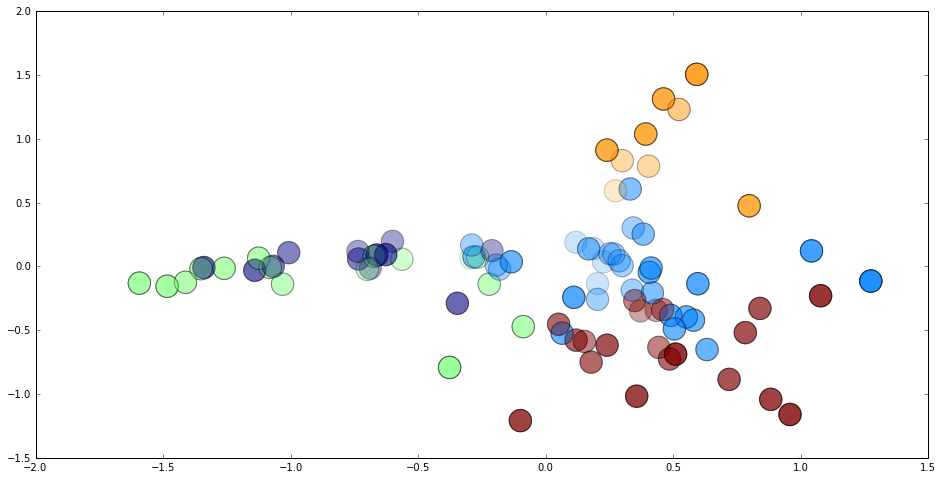

In [97]:


plt.figure(figsize=(16,8))
plt.scatter(df.x, df.y,c=df.cluster, s=500, alpha=0.2)